In [1]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
    
)
from sklearn.model_selection import GridSearchCV

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv('data_pivotedCI.csv')

In [4]:
data.head(14)

,Year,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,2006,665.333333,38.333333,1566.000000,NaN,NaN,1894.333333,841.333333,22.000000,42.666667,2358.666667,NaN,249.666667,164.666667,560.333333
1,2007,1075.333333,59.666667,1934.000000,NaN,NaN,1624.666667,1044.333333,52.000000,116.666667,2515.666667,NaN,338.333333,235.333333,585.000000
2,2008,915.333333,90.333333,1999.666667,NaN,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,NaN,355.333333,340.666667,1699.333333
3,2009,1016.333333,73.666667,1881.000000,NaN,NaN,907.666667,981.666667,39.666667,104.333333,2112.666667,NaN,402.000000,289.000000,1705.333333
4,2010,1114.666667,50.333333,1920.000000,NaN,NaN,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.000000,381.000000,297.333333,1498.666667
5,2011,1417.000000,47.666667,2198.333333,3890.000000,1818.666667,960.000000,1288.333333,48.666667,80.333333,2861.333333,1583.333333,413.000000,327.000000,1501.333333
6,2012,1083.000000,110.333333,2258.666667,3841.666667,1687.000000,931.666667,1291.333333,49.333333,85.000000,3327.666667,1733.333333,512.333333,323.333333,1487.000000
7,2013,1353.666667,127.000000,2215.666667,3593.333333,1743.000000,1071.666667,1276.666667,59.666667,110.333333,2794.000000,1533.333333,516.666667,520.333333,1384.666667
8,2014,1353.000000,179.666667,2317.333333,3396.666667,1727.666667,938.000000,1088.000000,68.000000,117.666667,2693.000000,2116.666667,563.333333,510.666667,1364.000000
9,2015,1459.000000,163.333333,2361.666667,3316.666667,1805.666667,945.000000,1102.333333,95.333333,119.666667,2811.333333,1500.000000,516.000000,552.333333,1178.666667


In [5]:
data_noyear = data.drop('Year', axis=1)

In [6]:
data_noyear.head(14)

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,665.333333,38.333333,1566.000000,NaN,NaN,1894.333333,841.333333,22.000000,42.666667,2358.666667,NaN,249.666667,164.666667,560.333333
1,1075.333333,59.666667,1934.000000,NaN,NaN,1624.666667,1044.333333,52.000000,116.666667,2515.666667,NaN,338.333333,235.333333,585.000000
2,915.333333,90.333333,1999.666667,NaN,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,NaN,355.333333,340.666667,1699.333333
3,1016.333333,73.666667,1881.000000,NaN,NaN,907.666667,981.666667,39.666667,104.333333,2112.666667,NaN,402.000000,289.000000,1705.333333
4,1114.666667,50.333333,1920.000000,NaN,NaN,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.000000,381.000000,297.333333,1498.666667
5,1417.000000,47.666667,2198.333333,3890.000000,1818.666667,960.000000,1288.333333,48.666667,80.333333,2861.333333,1583.333333,413.000000,327.000000,1501.333333
6,1083.000000,110.333333,2258.666667,3841.666667,1687.000000,931.666667,1291.333333,49.333333,85.000000,3327.666667,1733.333333,512.333333,323.333333,1487.000000
7,1353.666667,127.000000,2215.666667,3593.333333,1743.000000,1071.666667,1276.666667,59.666667,110.333333,2794.000000,1533.333333,516.666667,520.333333,1384.666667
8,1353.000000,179.666667,2317.333333,3396.666667,1727.666667,938.000000,1088.000000,68.000000,117.666667,2693.000000,2116.666667,563.333333,510.666667,1364.000000
9,1459.000000,163.333333,2361.666667,3316.666667,1805.666667,945.000000,1102.333333,95.333333,119.666667,2811.333333,1500.000000,516.000000,552.333333,1178.666667


In [7]:
data_backforwardfilled=data_noyear.bfill()
data_backforwardfilled

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,665.333333,38.333333,1566.000000,3890.000000,1765.666667,1894.333333,841.333333,22.000000,42.666667,2358.666667,1500.000000,249.666667,164.666667,560.333333
1,1075.333333,59.666667,1934.000000,3890.000000,1765.666667,1624.666667,1044.333333,52.000000,116.666667,2515.666667,1500.000000,338.333333,235.333333,585.000000
2,915.333333,90.333333,1999.666667,3890.000000,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,1500.000000,355.333333,340.666667,1699.333333
3,1016.333333,73.666667,1881.000000,3890.000000,1818.666667,907.666667,981.666667,39.666667,104.333333,2112.666667,1500.000000,402.000000,289.000000,1705.333333
4,1114.666667,50.333333,1920.000000,3890.000000,1818.666667,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.000000,381.000000,297.333333,1498.666667
5,1417.000000,47.666667,2198.333333,3890.000000,1818.666667,960.000000,1288.333333,48.666667,80.333333,2861.333333,1583.333333,413.000000,327.000000,1501.333333
6,1083.000000,110.333333,2258.666667,3841.666667,1687.000000,931.666667,1291.333333,49.333333,85.000000,3327.666667,1733.333333,512.333333,323.333333,1487.000000
7,1353.666667,127.000000,2215.666667,3593.333333,1743.000000,1071.666667,1276.666667,59.666667,110.333333,2794.000000,1533.333333,516.666667,520.333333,1384.666667
8,1353.000000,179.666667,2317.333333,3396.666667,1727.666667,938.000000,1088.000000,68.000000,117.666667,2693.000000,2116.666667,563.333333,510.666667,1364.000000
9,1459.000000,163.333333,2361.666667,3316.666667,1805.666667,945.000000,1102.333333,95.333333,119.666667,2811.333333,1500.000000,516.000000,552.333333,1178.666667


In [8]:
data_interpolate=data_noyear.interpolate()
data_interpolate

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
0,665.333333,38.333333,1566.000000,NaN,NaN,1894.333333,841.333333,22.000000,42.666667,2358.666667,NaN,249.666667,164.666667,560.333333
1,1075.333333,59.666667,1934.000000,NaN,NaN,1624.666667,1044.333333,52.000000,116.666667,2515.666667,NaN,338.333333,235.333333,585.000000
2,915.333333,90.333333,1999.666667,NaN,1765.666667,1005.666667,1017.333333,74.333333,224.000000,1696.666667,NaN,355.333333,340.666667,1699.333333
3,1016.333333,73.666667,1881.000000,NaN,1783.333333,907.666667,981.666667,39.666667,104.333333,2112.666667,NaN,402.000000,289.000000,1705.333333
4,1114.666667,50.333333,1920.000000,NaN,1801.000000,752.333333,1099.333333,16.666667,98.333333,2101.333333,1500.000000,381.000000,297.333333,1498.666667
5,1417.000000,47.666667,2198.333333,3890.000000,1818.666667,960.000000,1288.333333,48.666667,80.333333,2861.333333,1583.333333,413.000000,327.000000,1501.333333
6,1083.000000,110.333333,2258.666667,3841.666667,1687.000000,931.666667,1291.333333,49.333333,85.000000,3327.666667,1733.333333,512.333333,323.333333,1487.000000
7,1353.666667,127.000000,2215.666667,3593.333333,1743.000000,1071.666667,1276.666667,59.666667,110.333333,2794.000000,1533.333333,516.666667,520.333333,1384.666667
8,1353.000000,179.666667,2317.333333,3396.666667,1727.666667,938.000000,1088.000000,68.000000,117.666667,2693.000000,2116.666667,563.333333,510.666667,1364.000000
9,1459.000000,163.333333,2361.666667,3316.666667,1805.666667,945.000000,1102.333333,95.333333,119.666667,2811.333333,1500.000000,516.000000,552.333333,1178.666667


In [9]:
data_noyear.describe()

,Austria,Estonia,Finland,France,Germany,Ireland,Italy,Latvia,Lithuania,Luxembourg,Netherlands,Portugal,Slovenia,Spain
count,14.000000,14.000000,15.000000,9.000000,10.000000,13.000000,13.000000,15.000000,14.000000,14.000000,11.000000,14.000000,14.000000,14.000000
mean,1231.523810,176.238095,2249.444444,3416.111111,1849.633333,1082.358974,1102.410256,96.266667,160.285714,2567.523810,1909.090909,461.880952,399.904762,1241.690476
std,257.995253,166.084338,345.604914,297.715841,147.926696,315.179034,128.332551,80.136015,105.559952,429.486669,530.794145,104.026099,145.323243,354.110670
min,665.333333,38.333333,1566.000000,3060.000000,1687.000000,752.333333,841.333333,16.666667,42.666667,1696.666667,1500.000000,249.666667,164.666667,560.333333
25%,1077.250000,63.166667,1966.833333,3246.666667,1748.666667,938.000000,1044.333333,49.000000,99.833333,2225.666667,1558.333333,386.250000,303.833333,1092.333333
50%,1353.333333,118.666667,2258.666667,3316.666667,1812.166667,991.666667,1099.333333,68.000000,117.166667,2725.666667,1666.666667,513.666667,379.166667,1271.333333
75%,1410.166667,212.166667,2502.500000,3593.333333,1923.166667,1044.000000,1139.000000,113.333333,211.250000,2807.000000,2008.333333,540.916667,499.500000,1495.750000
max,1609.666667,564.333333,2881.666667,3890.000000,2190.666667,1894.333333,1291.333333,285.666667,434.000000,3327.666667,3100.000000,595.666667,713.333333,1705.333333


EURO_COUNTRIES = ['Austria', 'Estonia', 'Finland', 'France', 'Germany', 'Ireland','Italy', 'Latvia','Lithuania','Luxembourg', 'Netherlands', 'Portugal','Slovenia','Spain']

In [10]:
data_backfilled_missingdropped=data_backforwardfilled.dropna()

In [11]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Austria'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.85
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.05
Stationary


In [12]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Estonia'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: 3.75
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 1.00
Stationary


In [13]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Finland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -0.59
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.87
Stationary


In [14]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['France'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.95
Critial Values:
   1%, -4.47
Critial Values:
   5%, -3.29
Critial Values:
   10%, -2.77

p-value: 0.04
Non-Stationary


In [15]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Germany'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.04
Critial Values:
   1%, -4.33
Critial Values:
   5%, -3.23
Critial Values:
   10%, -2.75

p-value: 0.27
Stationary


In [16]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Ireland'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -3.99
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.00
Non-Stationary


In [17]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Italy'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -1.53
Critial Values:
   1%, -4.67
Critial Values:
   5%, -3.37
Critial Values:
   10%, -2.80

p-value: 0.52
Stationary


In [18]:
from statsmodels.tsa.stattools import adfuller
t_stat, p_value, _, _, critical_values, _  = adfuller(data_backfilled_missingdropped['Spain'].values, autolag='AIC')
print(f'ADF Statistic: {t_stat:.2f}')
for key, value in critical_values.items():
     print('Critial Values:')
     print(f'   {key}, {value:.2f}')
    
print(f'\np-value: {p_value:.2f}')
print("Stationary") if p_value > 0.05 else print("Non-Stationary")

ADF Statistic: -2.52
Critial Values:
   1%, -4.14
Critial Values:
   5%, -3.15
Critial Values:
   10%, -2.71

p-value: 0.11
Stationary


In [19]:
len(data_backfilled_missingdropped['Spain'])
#14 countries, 13 rows, 182 variables

13

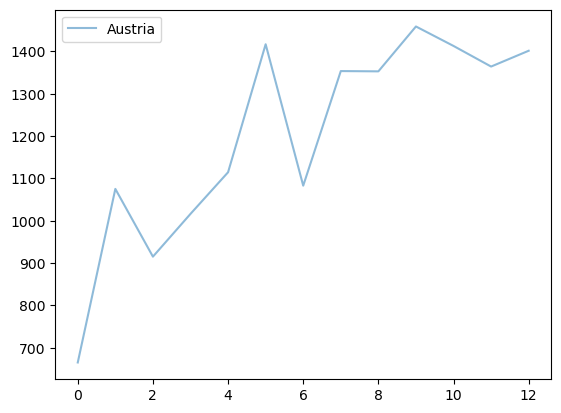

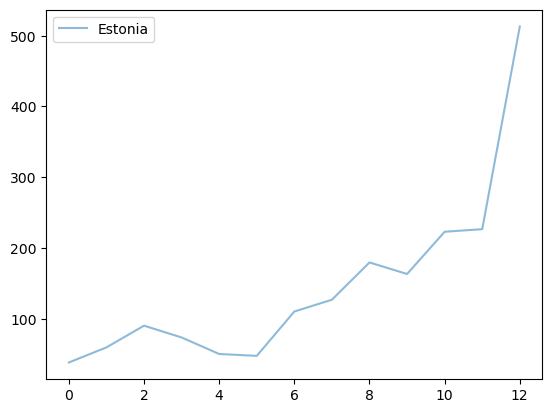

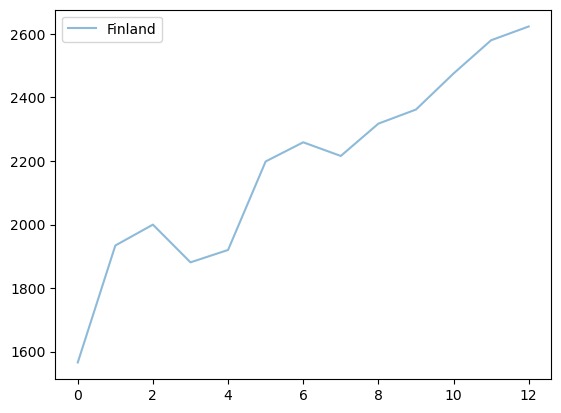

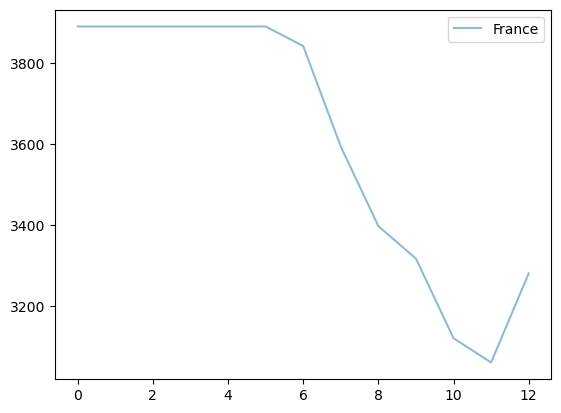

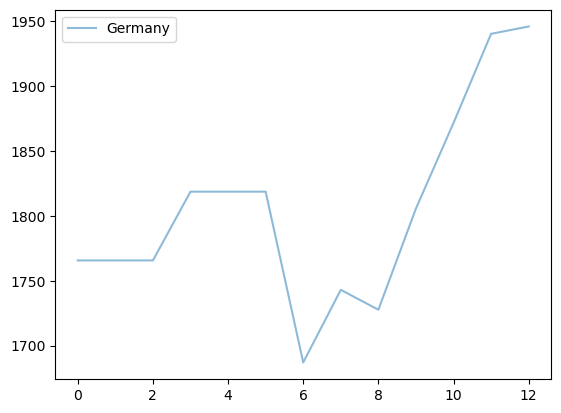

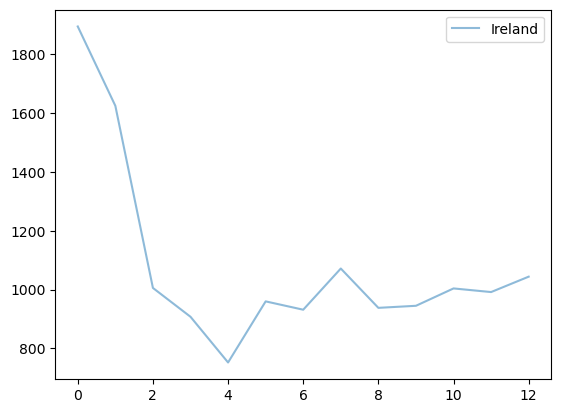

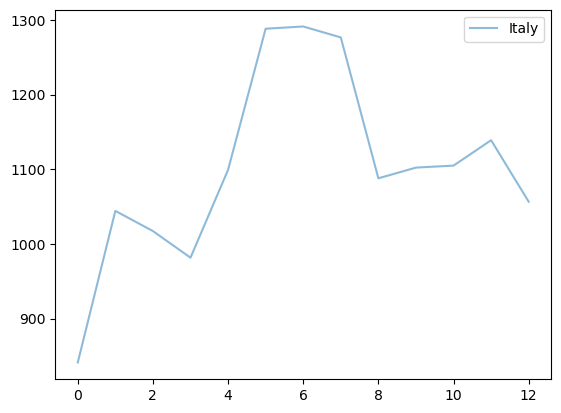

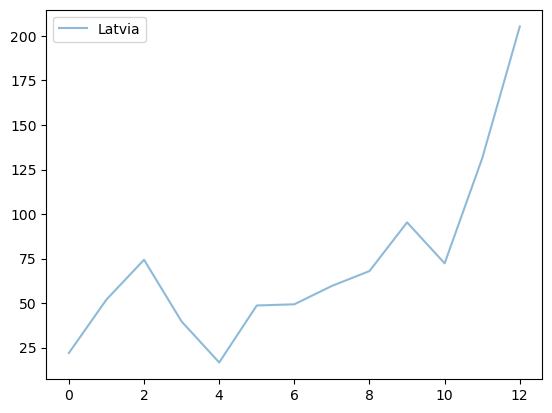

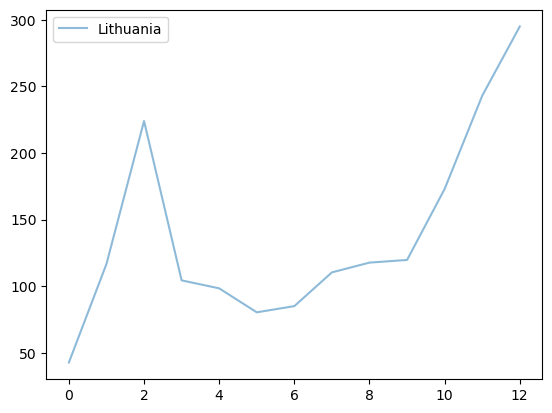

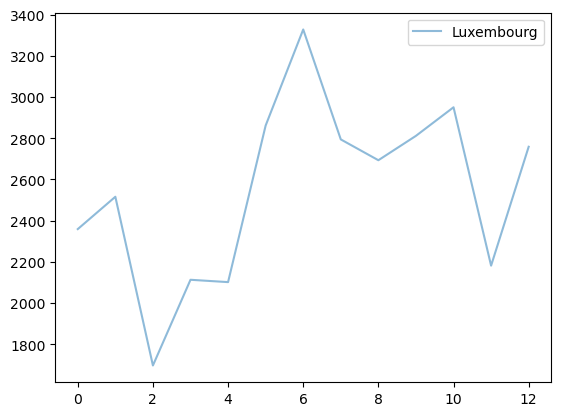

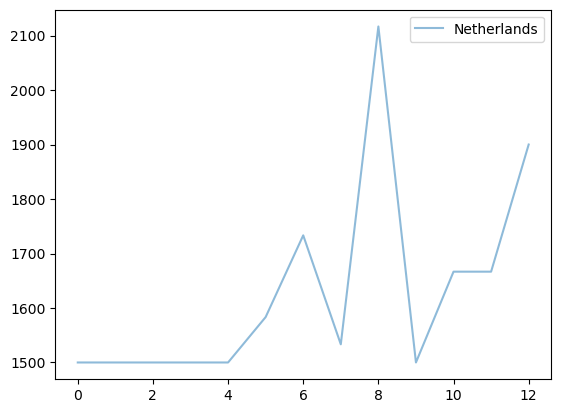

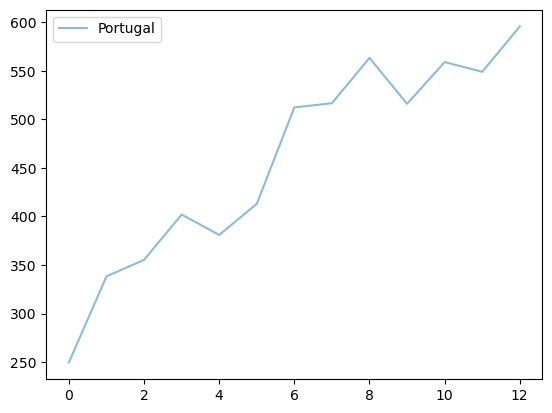

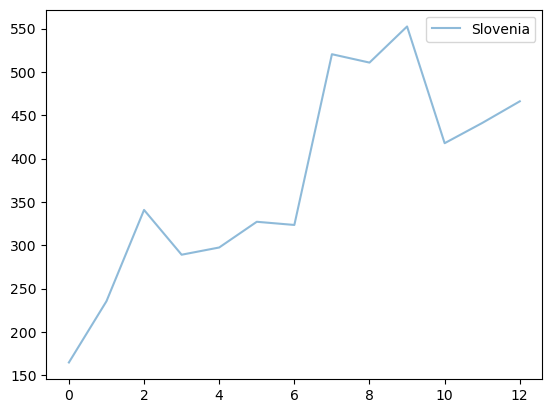

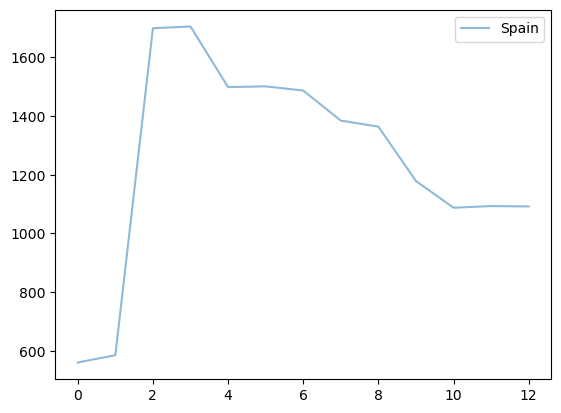

In [20]:
data_backfilled_missingdropped[['Austria']].plot(alpha=0.5);
data_backfilled_missingdropped[['Estonia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Finland']].plot(alpha=0.5);
data_backfilled_missingdropped[['France']].plot(alpha=0.5);
data_backfilled_missingdropped[['Germany']].plot(alpha=0.5);
data_backfilled_missingdropped[['Ireland']].plot(alpha=0.5);
data_backfilled_missingdropped[['Italy']].plot(alpha=0.5);
data_backfilled_missingdropped[['Latvia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Lithuania']].plot(alpha=0.5);
data_backfilled_missingdropped[['Luxembourg']].plot(alpha=0.5);
data_backfilled_missingdropped[['Netherlands']].plot(alpha=0.5);
data_backfilled_missingdropped[['Portugal']].plot(alpha=0.5);
data_backfilled_missingdropped[['Slovenia']].plot(alpha=0.5);
data_backfilled_missingdropped[['Spain']].plot(alpha=0.5);